## Studies on the Fermi's Golden Rule

In [1]:
using Plots             # For plotting results
using LaTeXStrings      # For the utilisation of Latex in Plots
using Interpolations    # For interpolation used in the animation
using LinearAlgebra     # For matrix computation

In [2]:
using FermiGoldenRule

### The simplest systems

We consider the simplest system, that is $\mathbb{C}^2$ which enables the interaction of two unidimentional systems on $\mathbb{C}$. Let $E_0, E_1, α \in \mathbb{C}$ and let us consider the Hamiltonian given by the matrix 
$$ H := \begin{pmatrix}
E_0     & \alpha^* \\
\alpha & E_1 
\end{pmatrix} = \underbrace{\begin{pmatrix}
E_0 & 0 \\
0 & E_1 
\end{pmatrix}}_{H_0}  + 
\underbrace{\begin{pmatrix}
0 &  \alpha^*\\
\alpha & 0
\end{pmatrix}}_{H_1}. $$

We will study the evolution of the system, starting  from the eigenvector $\varphi_0 = ^t(1,0)$ of $H_0$ corresponding to the eigenvalue $E_0$, and the evolution of the presence probability in the starting position, i.e the quantity $$ \langle\varphi_0, e^{-iHt} \varphi_0 ⟩ $$ for $t≥ 0$.

**First trivial case : $E_0 = E_1 = E$ and $α ∈ \mathbb{R}$** :

In [3]:
E = 1.0
α = 1.0
H = [E α; α E]
ϕ₀ = [1.0,0.0]
Nₜ = 10000
T = 10
sol = dynamics(H, ϕ₀; T = T, Nₜ = Nₜ)
proba₀ = proba(ϕ₀, sol)

10001-element Vector{Float64}:
 1.0
 0.9999990000003336
 0.999996000005334
 0.9999910000270009
 0.9999840000853343
 0.999975000208334
 0.9999640004319995
 0.99995100080033
 0.9999360013653238
 0.9999190021869785
 ⋮
 0.7113181646037047
 0.7104114432098952
 0.7095038801705937
 0.7085954791160507
 0.7076862436798693
 0.7067761774989904
 0.7058652842136769
 0.7049535674675013
 0.7040410309073288

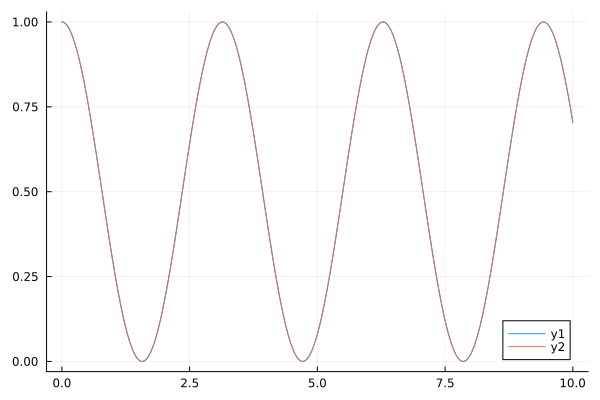

In [15]:
plot(LinRange(0,T,Nₜ+1), proba₀)
plot!(LinRange(0,T,Nₜ+1), (cos.(α.*LinRange(0,T,Nₜ+1)).^2))

**Second case : $E_0 ≠ E_1$ :**

In [120]:
E₁ = 1.0
E₂ = 4.0
α = 1.0
H = [E₁ α; α E₂]
ϕ₀ = [1.0,0.0]
Nₜ = 10000
T = 10
sol = dynamics(H, ϕ₀; T = T, Nₜ = Nₜ)
proba₀ = proba(ϕ₀, sol)

10001-element Vector{Float64}:
 1.0
 0.9999990000010834
 0.9999960000173335
 0.9999910000877498
 0.9999840002773316
 0.9999750006770762
 0.9999640014039785
 0.9999510026010285
 0.999936004437211
 0.9999190071075008
 ⋮
 0.8305427348736074
 0.8310946721906506
 0.8316468052767434
 0.8321991269541631
 0.8327516300427358
 0.8333043073599293
 0.8338571517209461
 0.8344101559388174
 0.834963312824496

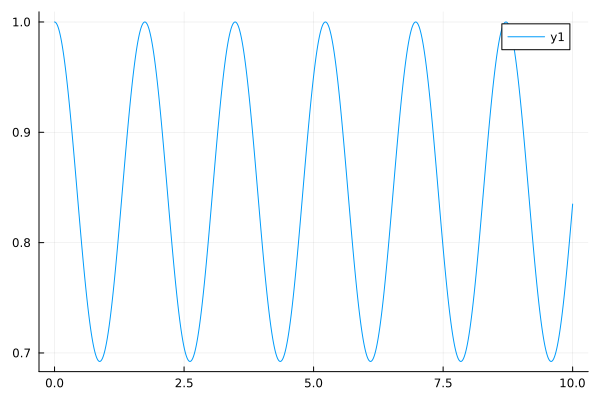

In [28]:
plot(LinRange(0,T,Nₜ+1), proba₀)

### Bigger systems

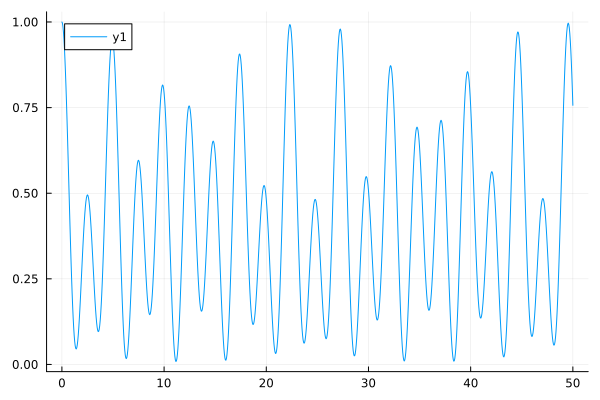

In [212]:
E₁ = 1.0
E₂ = 0.0
E₃ = 1.0
α = 0.8
H = [E₁ α α; α  E₂ 0; α 0 E₃]
ϕ₀ = [1.0,0.0, 0.0]
Nₜ = 1000
T = 50.0
sol = dynamics(H, ϕ₀; T = T, Nₜ = Nₜ)
proba₀ = proba(ϕ₀, sol)
plot(LinRange(0,T,Nₜ+1), proba₀)

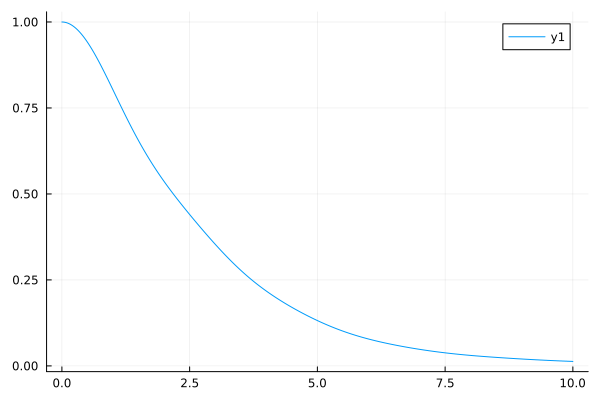

In [275]:
N = 100
Nₜ = 1000
T = 10
E = 1.0
α = [i == 1 ? 0.5 : 0.0 for i in 1:N] #rand(N) #


#A = diagm(LinRange(0.8,1.2,10)) #[-1.0 for i in 1:100]
Abiss(N::Int) = SymTridiagonal(zeros(N), ones(N-1))
#Abisss(N) = Diagonal(eigen(Abiss(N)).values) .+ Diagonal( rand(N))
#Abisz(N) = Diagonal(LinRange(min(eigen(Abiss(N)).values...),max(eigen(Abiss(N)).values...),N))


Hfun(x, ϕ) = (E*x + dot(α,ϕ), α.*x + Abiss(length(ϕ))*ϕ)
H = create_matrix(Hfun, (C, L2Z(1,N)))
ϕ₀ = [i == 1 ? 1.0 : 0.0 for i in 1:N+1]
sol = dynamics(H, ϕ₀ ; T = T, Nₜ = Nₜ)
proba₀ = proba(ϕ₀, sol)
plot(LinRange(0,T,Nₜ+1), proba₀)

In [276]:
function coeff_ordre2(H::Matrix, ϕ₀::Vector)
    sH = sqrt(H)
    sHϕ = sH * ϕ₀
    (-norm(H*ϕ₀)^2 + norm(sHϕ)^4)
end

function pownormlp(ϕ::Vector, p::Int)
    sum(abs.(ϕ).^p)
end

coeff = coeff_ordre2(H, ϕ₀)

-0.13006623302832776

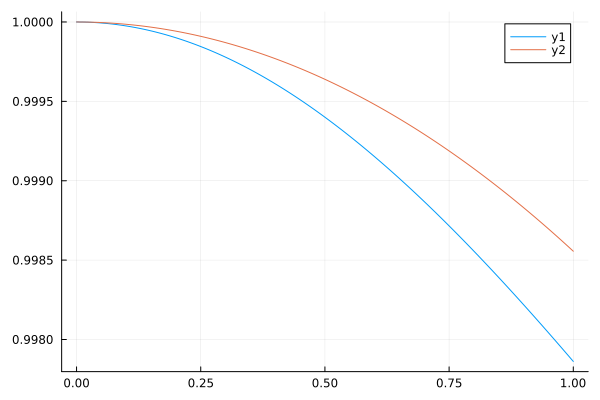

In [274]:
plot(LinRange(0,T,Nₜ+1), proba₀)
plot!(LinRange(0,T,Nₜ+1), (1 .+ coeff .* LinRange(0,T,Nₜ+1).^2))

In [243]:
N = 100
E = 1.0
α = [i == 1 ? 1.0 : 0.0 for i in 1:N] #rand(N) #
Abis(N::Int) = SymTridiagonal(zeros(N), ones(N-1))
Hfun(x, ϕ) = (E*x + dot(α,ϕ), α.*x + Abis(length(ϕ))*ϕ)
ϕ₀ = [i == 1 ? 1.0 : 0.0 for i in 1:N+1]
H = create_matrix(Hfun, (C, L2Z(1,N)))

101×101 Matrix{ComplexF64}:
 1.0+0.0im  1.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                           ⋮
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im 

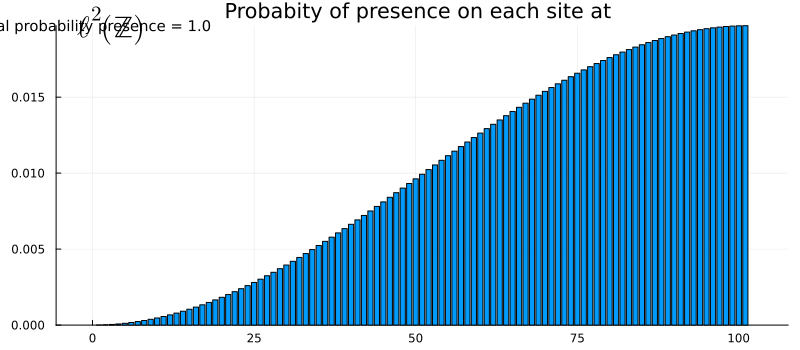

In [246]:
valp, vectp = eigen(H)
Φ₀ = vectp^(-1) * ϕ₀

function plot_proba_l2Z(ψ::Vector, t::Union{Real,Nothing} = nothing; Nmax::Int, Nmin::Int = -Nmax)

    _title = t!= nothing ? latexstring("\text{Probabity of presence on each site of Z }",t) : _title = "Probabity of presence on each site at "
    plt = plot(title = _title, size=(800,350), legend = false)
    
    proba = abs.(ψ).^2
    M = max(proba...) #max(proba[2:end]...) == 0.0 ? 1.0 : max(proba[2:end]...) 
    bar!(Nmin:Nmax, proba)

    plot!(ylim = [0.0,M])

    annotate!(0,M,text("Total probability presence = "*string(round(sum(proba),digits = 2)),10))
    annotate!(Nmin+2,M,text(L"\ell^2(\mathbb{Z})",20))

    plt
end

plot_proba_l2Z(Φ₀; Nmax = N+1, Nmin = 1)


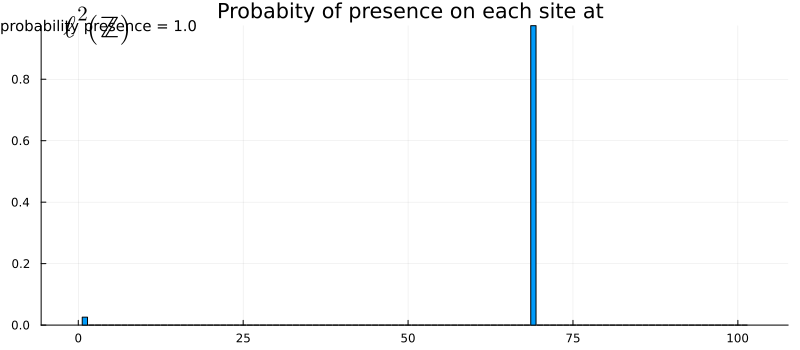

In [254]:
N = 100
E = 1.0
α = [i == 1 ? 0.5 : 0.0 for i in 1:N] #rand(N) #
Abisss(N) = Diagonal(eigen(Abis(N)).values)
Hfun(x, ϕ) = (E*x + dot(α,ϕ), α.*x + Abisss(length(ϕ))*ϕ)
ϕ₀ = [i == 1 ? 1.0 : 0.0 for i in 1:N+1]
H = create_matrix(Hfun, (C, L2Z(1,N)))

valp, vectp = eigen(H)
Φ₀ = vectp^(-1) * ϕ₀

plot_proba_l2Z(Φ₀; Nmax = N+1, Nmin = 1)